## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [8]:
app_train['YEAR_BIRTH'] = app_train['DAYS_BIRTH']/365

lower_bound = np.floor(app_train['YEAR_BIRTH'].min()).astype(np.int)
higher_bound = np.ceil(app_train['YEAR_BIRTH'].max()).astype(np.int)
step_list = [5, 10]

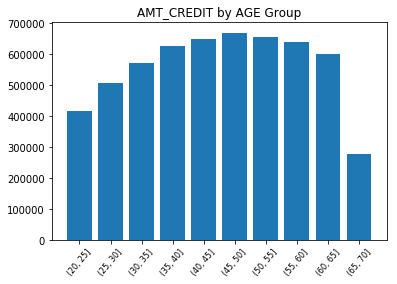

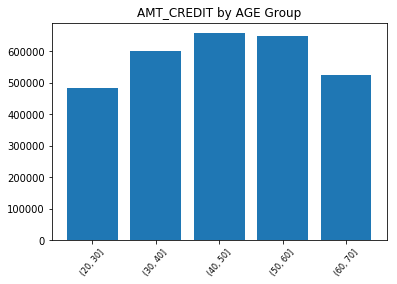

In [10]:
for step in step_list:
    app_train['equal_width_age'] = pd.cut(x=app_train['YEAR_BIRTH'], bins=range(lower_bound, higher_bound + step, step))
    age_group = app_train.groupby(by=['equal_width_age']).mean()

    temp_x = list(range(1, len(age_group.index) + 1))
    x = temp_x
    y = age_group['AMT_CREDIT']
    plt.bar(x, y)
    plt.xticks(temp_x, age_group.index, rotation=50, fontsize=8)
    plt.title('AMT_CREDIT by AGE Group')
    plt.show()

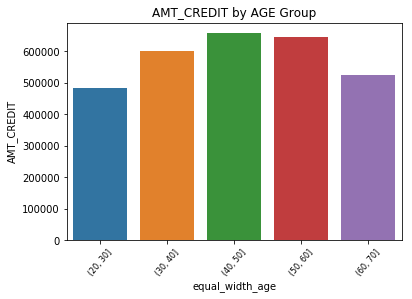

In [11]:
x = age_group.index
y = age_group['AMT_CREDIT']
sns.barplot(x ,y)
plt.xticks(rotation=50, fontsize=8)
plt.title('AMT_CREDIT by AGE Group')
plt.show()

#### Conclusion:
 - 年齡以10為組距，對年齡進行分組，由上圖可知信貸額度在40-50歲時最高，60-70歲信貸額度開始下降，符合一般的認知